 **Get Data**

In [ ]:
import pandas as pd
# "Date" sütununun tarih olduğunu belirtiyoruz
df=pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",parse_dates=["Date"],index_col=["Date"])

In [ ]:
from google.colab import files

# Kaggle API anahtarlarınızın bulunduğu JSON dosyasını seçin
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hamzabayram019","key":"18d8eec5a92d728a626ca56868da11e5"}'}

In [ ]:
import shutil

# Yüklenen JSON dosyasını ~/.kaggle/ klasörüne taşı
shutil.move('/content/kaggle.json', '/root/.kaggle/kaggle.json')

'/root/.kaggle/kaggle.json'

In [ ]:
import os
import zipfile
import pandas as pd

# Veriyi indir
os.system('kaggle datasets download -d ruchi798/currency-exchange-rates')

# ZIP dosyasını çıkar
with zipfile.ZipFile('/content/currency-exchange-rates.zip', 'r') as zip_ref:
    zip_ref.extractall()

# CSV dosyasını DataFrame'e yükle
csv_filename = '/content/exchange_rates.csv'
dataset = pd.read_csv(csv_filename)

# İlk birkaç satırı görüntüle
print(dataset.head())

   Unnamed: 0     Country/Currency currency       value        date
0           0     Australia Dollar      AUD    1.581627  17/12/2021
1           1  Great Britain Pound      GBP    0.851619  17/12/2021
2           2                 Euro      EUR    1.000000  17/12/2021
3           3            Japan Yen      JPY  128.301759  17/12/2021
4           4    Switzerland Franc      CHF    1.041015  17/12/2021


In [ ]:
df=pd.read_csv("/content/exchange_rates.csv",parse_dates=["date"],index_col=["date"])

<ipython-input-276-1975ceaeffda>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df=pd.read_csv("/content/exchange_rates.csv",parse_dates=["date"],index_col=["date"])


In [ ]:
df

,Unnamed: 0,Country/Currency,currency,value
date,,,,
2021-12-17,0,Australia Dollar,AUD,1.581627
2021-12-17,1,Great Britain Pound,GBP,0.851619
2021-12-17,2,Euro,EUR,1.000000
2021-12-17,3,Japan Yen,JPY,128.301759
2021-12-17,4,Switzerland Franc,CHF,1.041015
...,...,...,...,...
2023-09-13,95492,United Arab Emirates Dirham,AED,3.952607
2023-09-13,95493,Vanuatu Vatu,VUV,131.563257
2023-09-13,95494,Vietnam Dong,VND,25950.058378


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95497 entries, 2021-12-17 to 2023-09-13
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        95497 non-null  int64  
 1   Country/Currency  95497 non-null  object 
 2   currency          95497 non-null  object 
 3   value             95497 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.6+ MB


In [ ]:
df.describe()

,Unnamed: 0,value
count,95497.000000,95497.000000
mean,47748.000000,1658.297657
std,27567.753666,5494.901706
min,0.000000,0.130975
25%,23874.000000,3.966550
50%,47748.000000,35.073997
75%,71622.000000,395.609320
max,95496.000000,51690.453353


In [ ]:
data_tr = df.loc[df.currency == 'TRY']

In [ ]:
# Tüm farklı para birimlerini alın
unique_currencies = df['currency'].unique()

# Her bir para birimi için değerleri çekip bir veri çerçevesi oluşturun
currency_dataframes = {}
for currency in unique_currencies:
    currency_dataframes[currency] = df.loc[df['currency'] == currency]['value']

# Korelasyonları hesaplamak için bir korelasyon matrisi oluşturun
correlation_matrix = pd.DataFrame()
for currency1 in unique_currencies:
    for currency2 in unique_currencies:
        if currency1 != currency2:
            correlation_matrix.loc[currency1, currency2] = currency_dataframes[currency1].corr(currency_dataframes[currency2])

In [ ]:
import numpy as np

# Korelasyon matrisindeki korelasyon değerlerini alma
correlation_values = []
for currency1 in unique_currencies:
    for currency2 in unique_currencies:
        if currency1 != currency2:
            correlation_values.append(correlation_matrix.loc[currency1, currency2])

# Korelasyon değerlerini büyükten küçüğe sıralama
sorted_indices = np.argsort(correlation_values)[::-1]  # Büyükten küçüğe sıralanmış dizinler

# Korelasyon değerlerini ve karşılık gelen para birimi çiftlerini yazdırma
for index in sorted_indices:
    currency1_index = index // (len(unique_currencies) - 1)
    currency2_index = index % (len(unique_currencies) - 1)
    if currency2_index >= currency1_index:
        currency2_index += 1
    currency1 = unique_currencies[currency1_index]
    currency2 = unique_currencies[currency2_index]
    correlation_value = correlation_values[index]
    if((currency1=="TRY" or currency2=="TRY")):
      print(f"{currency1}-{currency2}: {correlation_value:.4f}")

In [ ]:
data_tr[:-20]

,Unnamed: 0,Country/Currency,currency,value
date,,,,
2021-12-17,141,Turkish New Lira,TRY,19.067235
2021-12-18,291,Turkish New Lira,TRY,18.451273
2021-12-19,441,Turkish New Lira,TRY,18.451273
2021-12-20,591,Turkish New Lira,TRY,18.802070
2021-12-21,741,Turkish New Lira,TRY,15.199323
...,...,...,...,...
2023-08-20,91912,Turkish New Lira,TRY,29.514027
2023-08-21,92061,Turkish New Lira,TRY,29.529112
2023-08-22,92210,Turkish New Lira,TRY,29.643369


In [ ]:
data_tr_prices = data_tr
data_tr_prices.head()

,Unnamed: 0,Country/Currency,currency,value
date,,,,
2021-12-17,141,Turkish New Lira,TRY,19.067235
2021-12-18,291,Turkish New Lira,TRY,18.451273
2021-12-19,441,Turkish New Lira,TRY,18.451273
2021-12-20,591,Turkish New Lira,TRY,18.802070
2021-12-21,741,Turkish New Lira,TRY,15.199323


**ARIMA MODEL YAPIMI**

In [ ]:
data_tr_prices=data_tr_prices.drop(["Unnamed: 0","Country/Currency","currency"],axis=1)

In [ ]:
data_tr_prices.head(-5)

,value
date,
2021-12-17,19.067235
2021-12-18,18.451273
2021-12-19,18.451273
2021-12-20,18.802070
2021-12-21,15.199323
...,...
2023-04-09,28.738926
2023-05-09,28.895616
2023-06-09,28.731184


In [ ]:
data_tr_prices[-10:]

,value
2023-09-09,28.755852
2023-10-09,28.755852
2023-11-09,28.744460
2023-12-09,28.891764
2023-09-13,28.972384
2023-08-09,28.730000
2023-08-10,28.740000
2023-08-11,28.890000
2023-08-12,28.940000
2023-08-13,28.930000


In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF (t-istatistic)  : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("------------------------------------------------")
     print("P VALUE İÇİN :")
     if dftest[1]>0.05:
        print("Data DURAGAN DEGİL!")
     if dftest[1]<0.05:
        print("Data DURAGANDIR!")
     print("")
     print("ADF (T-ISTATISTIC) İÇİN :")
     counter=0
     for key, val in dftest[4].items():
      if (abs(dftest[0])<abs(val)):
        counter=counter+1
     if counter==len(dftest[4].items()):
      print("Data DURAGAN DEGİL!")
     else:
      print("Data DURAGANDIR")

     print("------------------------------------------------")
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [ ]:
ad_test(data_tr_prices['value'])

1. ADF (t-istatistic)  :  0.25019652224691563
2. P-Value :  0.974940539720678
3. Num Of Lags :  8
4. Num Of Observations Used For ADF Regression: 628
------------------------------------------------
P VALUE İÇİN :
Data DURAGAN DEGİL!

ADF (T-ISTATISTIC) İÇİN :
Data DURAGAN DEGİL!
------------------------------------------------
5. Critical Values :
	 1% :  -3.4408057813848147
	 5% :  -2.866153285929353
	 10% :  -2.569226804028561


In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(data_tr_prices['value'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-37.298, Time=4.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-19.032, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-36.302, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-35.704, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-18.305, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-37.776, Time=2.47 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-33.813, Time=0.96 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-39.186, Time=1.51 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-37.556, Time=3.94 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-34.574, Time=0.81 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-40.063, Time=0.88 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-35.698, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-36.435, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-38.455, Time=1.16 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-38.6

In [ ]:
len(data_tr_prices['value'])

637

In [ ]:
print(data_tr_prices.shape)
train=data_tr_prices.iloc[:-125]
test=data_tr_prices.iloc[-125:]
print(train.shape,test.shape)

(637, 1)
(512, 1) (125, 1)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA modelini oluşturun
model = ARIMA(train['value'], order=(1, 0, 1))

# Modeli uyarayın
model = model.fit()

# Model özetini görüntüleyin
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  512
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  58.479
Date:                Wed, 13 Sep 2023   AIC                           -108.958
Time:                        13:02:01   BIC                            -92.004
Sample:                             0   HQIC                          -102.312
                                - 512                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.8515      2.696      6.992      0.000      13.567      24.136
ar.L1          0.9921      0.007    152.474      0.000       0.979       1.005
ma.L1          0.2135      0.025      8.440      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='date'>

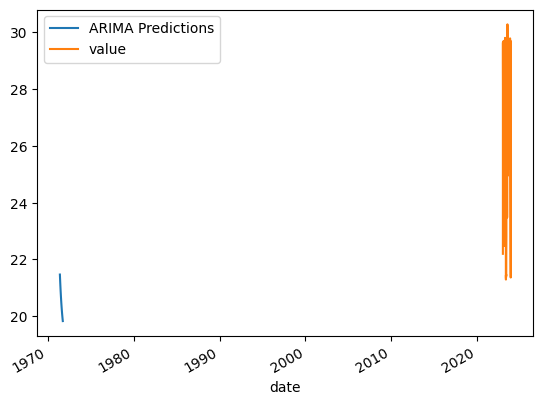

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['value'].plot(legend=True)

In [ ]:
pred[:50]

512    21.467518
513    21.446850
514    21.426345
515    21.406002
516    21.385820
517    21.365797
518    21.345932
519    21.326225
520    21.306673
521    21.287275
522    21.268031
523    21.248939
524    21.229997
525    21.211205
526    21.192562
527    21.174066
528    21.155716
529    21.137512
530    21.119451
531    21.101532
532    21.083755
533    21.066119
534    21.048622
535    21.031263
536    21.014042
537    20.996956
538    20.980006
539    20.963189
540    20.946505
541    20.929953
542    20.913532
543    20.897241
544    20.881078
545    20.865043
546    20.849135
547    20.833352
548    20.817694
549    20.802160
550    20.786748
551    20.771458
552    20.756289
553    20.741240
554    20.726310
555    20.711498
556    20.696803
557    20.682223
558    20.667759
559    20.653410
560    20.639173
561    20.625050
Name: ARIMA Predictions, dtype: float64

In [ ]:
test[:50]

,value
date,
2023-12-05,21.363353
2023-05-13,21.429183
2023-05-14,21.418024
2023-05-15,21.291323
2023-05-16,21.412914
2023-05-17,21.445982
2023-05-18,21.400576
2023-05-19,21.352295
2023-05-20,21.442018


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
test['value'].mean()
rmse=sqrt(mean_squared_error(pred,test['value']))
mae = mean_absolute_error(test['value'], pred)
mape = mean_absolute_percentage_error(test['value'], pred)

print("MAE:", mae)
print("RMSE",rmse)
print("MAPE:", mape)

MAE: 5.234753319440483
RMSE 5.941706423096701
MAPE: 0.1826045798019431


In [ ]:
data_tr_prices

,value
date,
2021-12-17,19.067235
2021-12-18,18.451273
2021-12-19,18.451273
2021-12-20,18.802070
2021-12-21,15.199323
...,...
2023-09-09,28.755852
2023-10-09,28.755852
2023-11-09,28.744460


In [ ]:
last_7_values = data_tr_prices["value"].tail(7)
print(last_7_values)

date
2023-07-09    28.762852
2023-08-09    28.742915
2023-09-09    28.755852
2023-10-09    28.755852
2023-11-09    28.744460
2023-12-09    28.891764
2023-09-13    28.972384
Name: value, dtype: float64


In [ ]:
pred_7 = model.predict(start=len([data_tr_prices["value"]])-7, end=len(data_tr_prices["value"])-1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
data_tr_prices["value"].head(10)

date
2021-12-17    19.067235
2021-12-18    18.451273
2021-12-19    18.451273
2021-12-20    18.802070
2021-12-21    15.199323
2021-12-22    13.982169
2021-12-23    13.670038
2021-12-24    13.129361
2021-12-25    12.464678
2021-12-26    12.464678
Name: value, dtype: float64

In [ ]:
pred_010 = model.predict(0,train[:10])

In [ ]:
pred_010

date
2021-12-17     0.000000
2021-12-18    28.600853
2021-12-19    17.835312
2021-12-20    18.208016
2021-12-21    18.800721
2021-12-22    13.572480
2021-12-23    12.930714
2021-12-24    12.921963
2021-12-25    12.360796
2021-12-26    11.682230
2021-12-27    11.904012
Name: predicted_mean, dtype: float64

In [ ]:
forecast = model.forecast(steps=30)

# Tahmin sonuçlarını görüntüle
print("İleriki 7 Veri Tahminleri:")
print(forecast)

İleriki 7 Veri Tahminleri:
512    21.488749
513    21.497441
514    21.504481
515    21.511173
516    21.517793
517    21.524397
518    21.530997
519    21.537598
520    21.544198
521    21.550798
522    21.557398
523    21.563998
524    21.570598
525    21.577197
526    21.583797
527    21.590397
528    21.596997
529    21.603597
530    21.610197
531    21.616797
532    21.623397
533    21.629997
534    21.636597
535    21.643197
536    21.649797
537    21.656397
538    21.662997
539    21.669597
540    21.676197
541    21.682797
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


**ARIMA MODEL SONU**

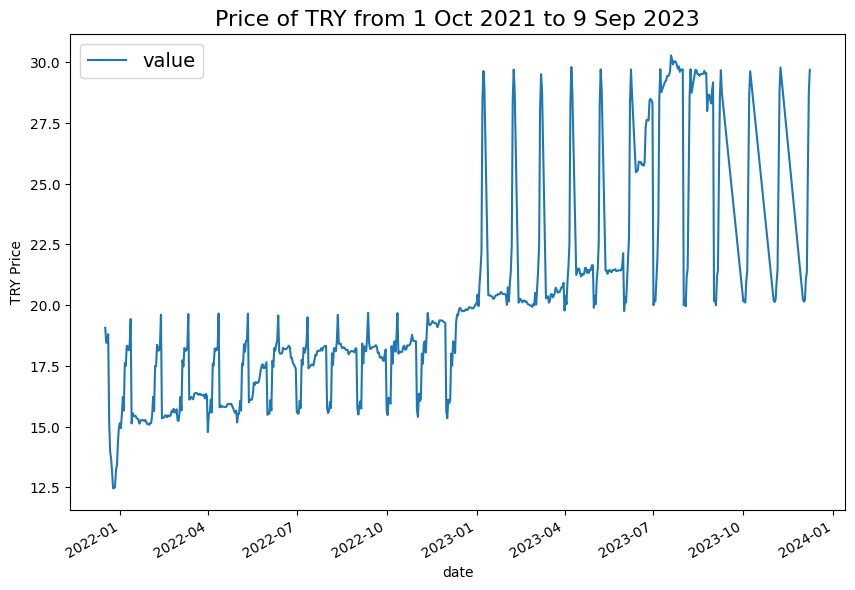

In [ ]:
import matplotlib.pyplot as plt
data_tr_prices.plot(figsize=(10, 7))
plt.ylabel("TRY Price")
plt.title("Price of TRY from 1 Oct 2021 to 9 Sep 2023", fontsize=16)
plt.legend(fontsize=14);

In [ ]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

FileNotFoundError: ignored

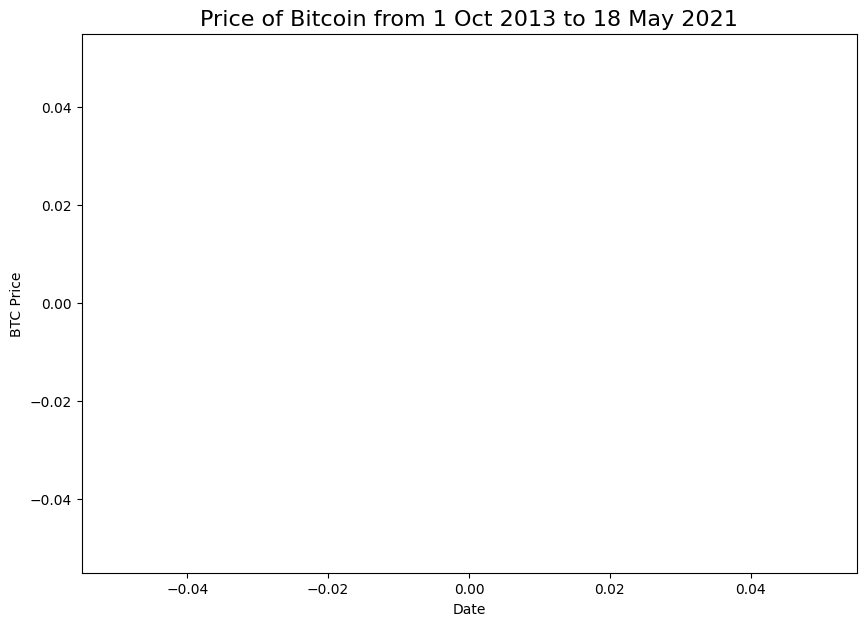

In [ ]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

**Train and Test Split**

In [ ]:
# Get bitcoin date array
timesteps = data_tr_prices.index.to_numpy()
prices = data_tr_prices["value"].to_numpy()

timesteps[:10], prices[:10]

(array(['2021-12-17T00:00:00.000000000', '2021-12-18T00:00:00.000000000',
        '2021-12-19T00:00:00.000000000', '2021-12-20T00:00:00.000000000',
        '2021-12-21T00:00:00.000000000', '2021-12-22T00:00:00.000000000',
        '2021-12-23T00:00:00.000000000', '2021-12-24T00:00:00.000000000',
        '2021-12-25T00:00:00.000000000', '2021-12-26T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([19.067235, 18.451273, 18.451273, 18.80207 , 15.199323, 13.982169,
        13.670038, 13.129361, 12.464678, 12.464678]))

In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(509, 128, 509, 128)

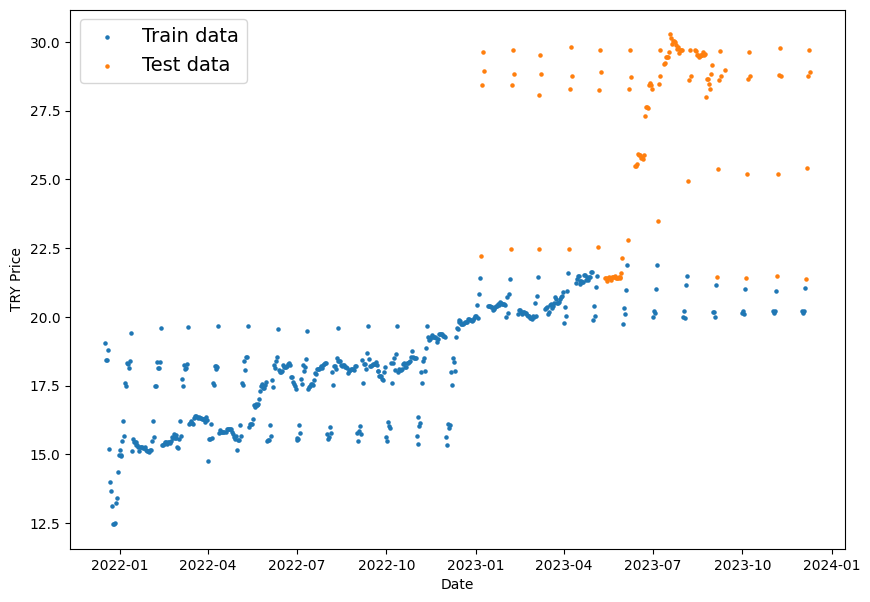

In [ ]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("TRY Price")
plt.legend(fontsize=14)
plt.show();

In [ ]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

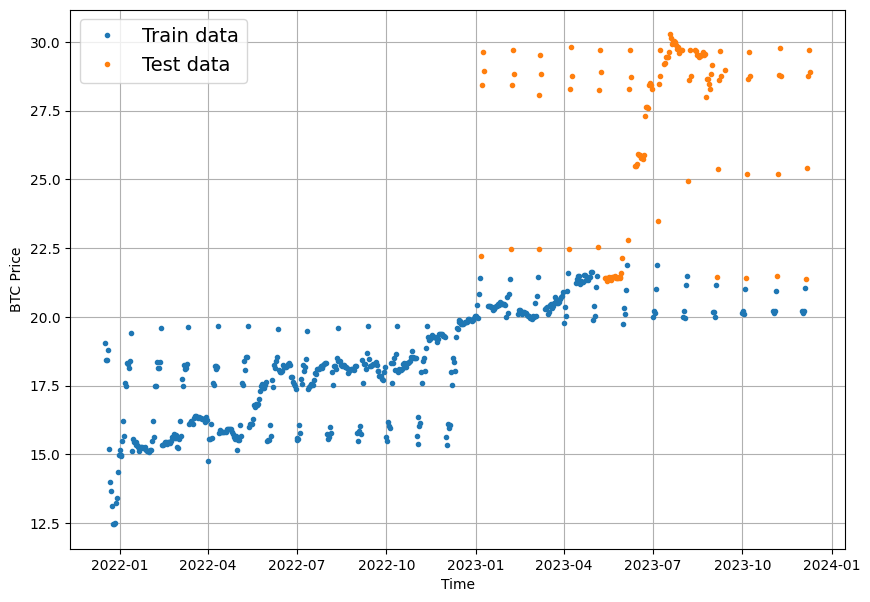

In [ ]:
plt.figure(figsize=(10, 7))
#plt.subplot(2, 1, 1) # 2 satırlık subplot alanı oluşturulacak, bu kod birinci subplot'a odaklanmayı sağlar
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
#plt.subplot(2, 1, 2) # 2 satırlık subplot alanı oluşturulacak, bu kod ikinci subplot'a odaklanmayı sağlar
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
#plt.tight_layout() # subplot'lar arasındaki boşlukları ayarlamak için kullanılır
plt.show()

**Naive Model(Baseline)**

In [ ]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10

(array([21.434623, 21.418217, 21.472193, 21.363353, 21.429183, 21.418024,
        21.291323, 21.412914, 21.445982, 21.400576]),
 array([28.824771, 28.738926, 28.895616, 28.731184, 28.762852, 28.742915,
        28.755852, 28.755852, 28.74446 , 28.891764]))

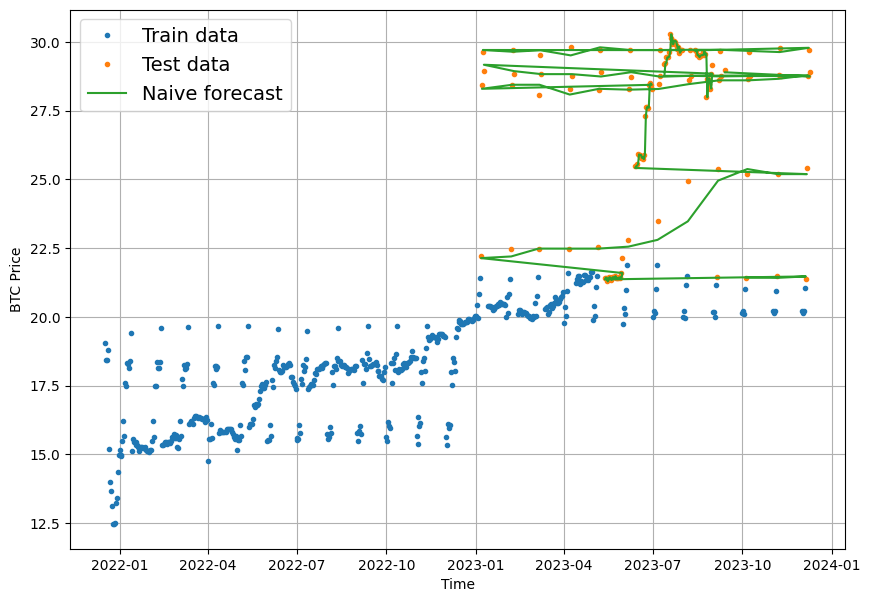

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

In [ ]:
import tensorflow as tf

In [ ]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
#Results of Metrics
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 0.15367521,
 'mse': 0.090933986,
 'rmse': 0.30155262,
 'mape': 0.5747481,
 'mase': 0.99206346}

In [ ]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

26.781849551181104

 **Windowing our Data**

In [ ]:
import numpy as np

In [ ]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(630, 630)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [19.067235 18.451273 18.451273 18.80207  15.199323 13.982169 13.670038] -> Label: [13.129361]
Window: [18.451273 18.451273 18.80207  15.199323 13.982169 13.670038 13.129361] -> Label: [12.464678]
Window: [18.451273 18.80207  15.199323 13.982169 13.670038 13.129361 12.464678] -> Label: [12.464678]


In [ ]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [29.166159 28.933494 28.824771 28.824771 28.738926 28.895616 28.731184] -> Label: [28.762852]
Window: [28.933494 28.824771 28.824771 28.738926 28.895616 28.731184 28.762852] -> Label: [28.742915]
Window: [28.824771 28.824771 28.738926 28.895616 28.731184 28.762852 28.742915] -> Label: [28.755852]


In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(504, 126, 504, 126)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[19.067235, 18.451273, 18.451273, 18.80207 , 15.199323, 13.982169,
         13.670038],
        [18.451273, 18.451273, 18.80207 , 15.199323, 13.982169, 13.670038,
         13.129361],
        [18.451273, 18.80207 , 15.199323, 13.982169, 13.670038, 13.129361,
         12.464678],
        [18.80207 , 15.199323, 13.982169, 13.670038, 13.129361, 12.464678,
         12.464678],
        [15.199323, 13.982169, 13.670038, 13.129361, 12.464678, 12.464678,
         12.513801]]),
 array([[13.129361],
        [12.464678],
        [12.464678],
        [12.513801],
        [13.223056]]))

In [ ]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

**MODEL 1 : DENSE MODEL(WINDOW=7 , HORIZON=1)**

In [ ]:
import tensorflow as tfa
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
history_model_1= model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
4/4 [==============================] - 8s 223ms/step - loss: 16.6125 - mae: 16.6125 - val_loss: 20.7627 - val_mae: 20.7627
Epoch 2/100
4/4 [==============================] - 0s 125ms/step - loss: 12.5042 - mae: 12.5042 - val_loss: 14.8023 - val_mae: 14.8023
Epoch 3/100
4/4 [==============================] - 0s 118ms/step - loss: 8.4706 - mae: 8.4706 - val_loss: 8.9009 - val_mae: 8.9009
Epoch 4/100
4/4 [==============================] - 0s 126ms/step - loss: 4.4421 - mae: 4.4421 - val_loss: 2.9483 - val_mae: 2.9483
Epoch 5/100
4/4 [==============================] - 1s 192ms/step - loss: 1.0088 - mae: 1.0088 - val_loss: 2.1682 - val_mae: 2.1682
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 2.0545 - mae: 2.0545 - val_loss: 3.1907 - val_mae: 3.1907
Epoch 7/100
4/4 [==============================] - 0s 125ms/step - loss: 2.0198 - mae: 2.0198 - val_loss: 1.5981 - val_mae: 1.5981
Epoch 8/100
4/4 [==============================] - 0s 124ms/step - loss: 0.6

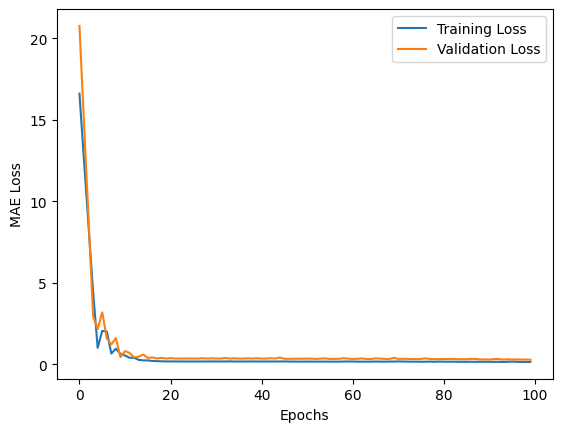

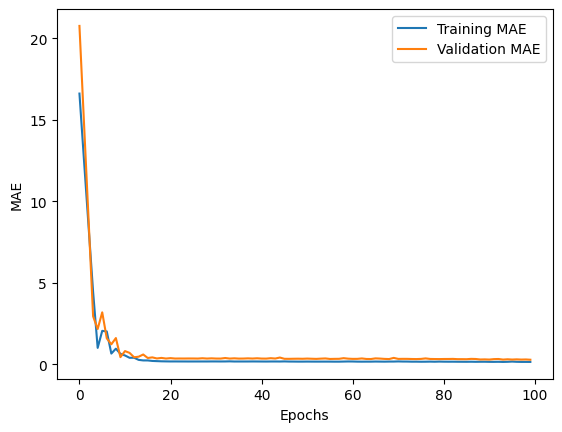

In [ ]:
import matplotlib.pyplot as plt

# Eğitimdeki kayıp değerlerini çizin
plt.plot(history_model_1.history['loss'], label='Training Loss')
plt.plot(history_model_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.legend()
plt.show()

# Eğitimdeki metrik değerlerini çizin
plt.plot(history_model_1.history['mae'], label='Training MAE')
plt.plot(history_model_1.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

4/4 [==============================] - 0s 6ms/step - loss: 0.2837 - mae: 0.2837


[0.2836684584617615, 0.2836684584617615]

In [ ]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

4/4 [==============================] - 0s 4ms/step - loss: 0.2837 - mae: 0.2837


[0.2836684584617615, 0.2836684584617615]

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
#Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

4/4 [==============================] - 0s 3ms/step


(126,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([21.613663, 21.656904, 21.72746 , 21.69821 , 21.613604, 21.559973,
        21.479471, 21.480104, 21.445234, 21.435085], dtype=float32)>)

In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 0.28366846,
 'mse': 0.23864982,
 'rmse': 0.48851797,
 'mape': 1.0723495,
 'mase': 1.831246}

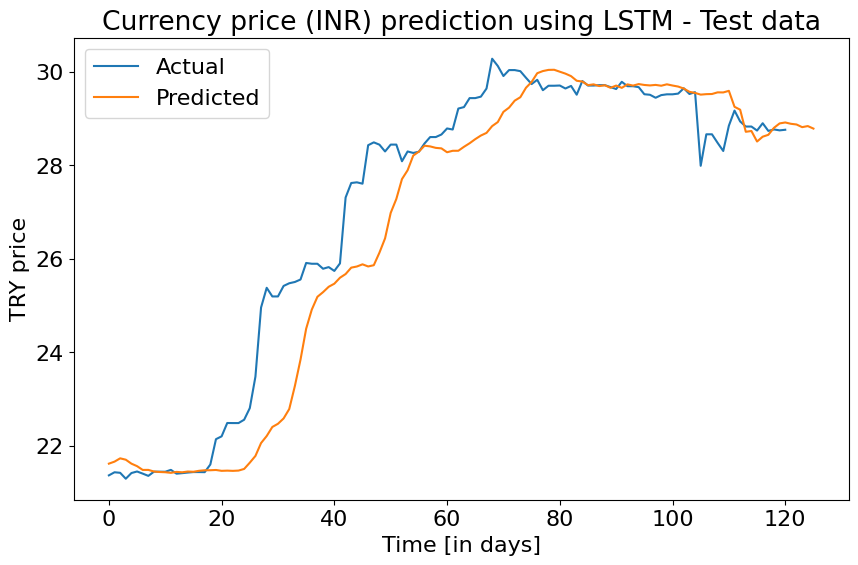

In [ ]:
plt.rc("figure", figsize=(10, 6))
plt.rcParams.update({'font.size': 16})
plt.plot(test_labels, label='Actual')
plt.plot(model_1_preds, label='Predicted')
plt.xlabel('Time [in days]')
plt.ylabel('TRY price')
plt.title('Currency price (INR) prediction using LSTM - Test data')
plt.legend()
plt.show()

**MODEL 2 : DENSE MODEL(WINDOW= 30 , HORIZON=1)**

In [ ]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [ ]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(603, 603)

In [ ]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(482, 121, 482, 121)

In [ ]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

history_model_2=model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
4/4 [==============================] - 1s 170ms/step - loss: 6.3830 - mae: 6.3830 - val_loss: 3.0727 - val_mae: 3.0727
Epoch 2/100
4/4 [==============================] - 0s 131ms/step - loss: 2.3601 - mae: 2.3601 - val_loss: 1.8147 - val_mae: 1.8147
Epoch 3/100
4/4 [==============================] - 0s 164ms/step - loss: 1.3295 - mae: 1.3295 - val_loss: 1.7573 - val_mae: 1.7573
Epoch 4/100
4/4 [==============================] - 1s 185ms/step - loss: 0.9606 - mae: 0.9606 - val_loss: 1.7152 - val_mae: 1.7152
Epoch 5/100
4/4 [==============================] - 0s 22ms/step - loss: 0.6988 - mae: 0.6988 - val_loss: 1.8656 - val_mae: 1.8656
Epoch 6/100
4/4 [==============================] - 1s 196ms/step - loss: 0.5568 - mae: 0.5568 - val_loss: 1.6203 - val_mae: 1.6203
Epoch 7/100
4/4 [==============================] - 1s 184ms/step - loss: 0.5037 - mae: 0.5037 - val_loss: 1.6022 - val_mae: 1.6022
Epoch 8/100
4/4 [==============================] - 0s 22ms/step - loss: 0.4850 - mae

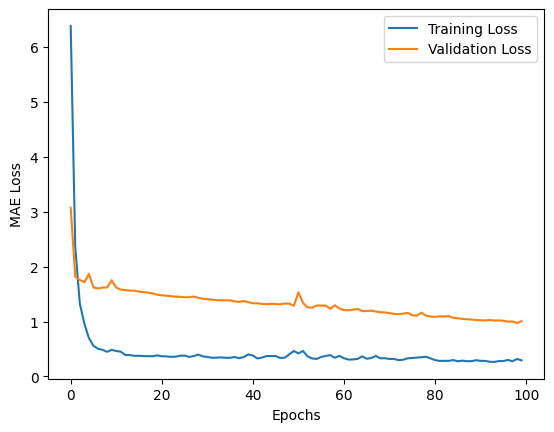

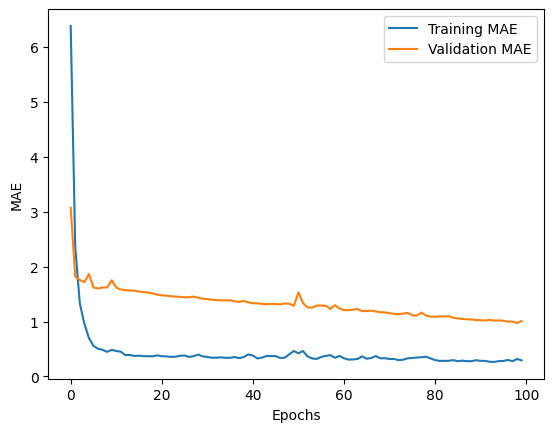

In [ ]:
import matplotlib.pyplot as plt

# Eğitimdeki kayıp değerlerini çizin
plt.plot(history_model_2.history['loss'], label='Training Loss')
plt.plot(history_model_2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.legend()
plt.show()

# Eğitimdeki metrik değerlerini çizin
plt.plot(history_model_2.history['mae'], label='Training MAE')
plt.plot(history_model_2.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

4/4 [==============================] - 0s 4ms/step - loss: 1.0086 - mae: 1.0086


[1.0086051225662231, 1.0086051225662231]

In [ ]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 0.9716 - mae: 0.9716


[0.9716492891311646, 0.9716492891311646]

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

4/4 [==============================] - 0s 5ms/step


In [ ]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 0.9716493,
 'mse': 1.9295564,
 'rmse': 1.3890847,
 'mape': 3.619409,
 'mase': 6.2219553}

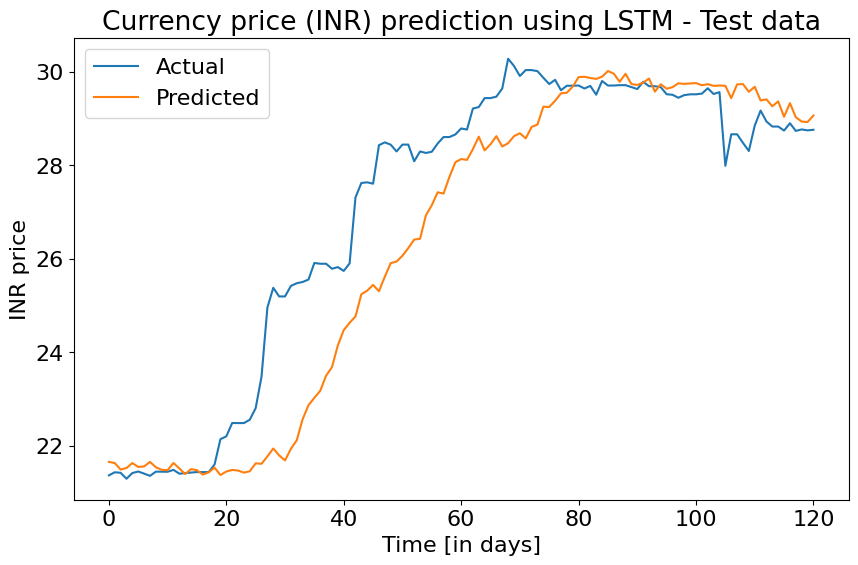

In [ ]:
plt.rc("figure", figsize=(10, 6))
plt.rcParams.update({'font.size': 16})
plt.plot(test_labels, label='Actual')
plt.plot(model_2_preds, label='Predicted')
plt.xlabel('Time [in days]')
plt.ylabel('INR price')
plt.title('Currency price (INR) prediction using LSTM - Test data')
plt.legend()
plt.show()


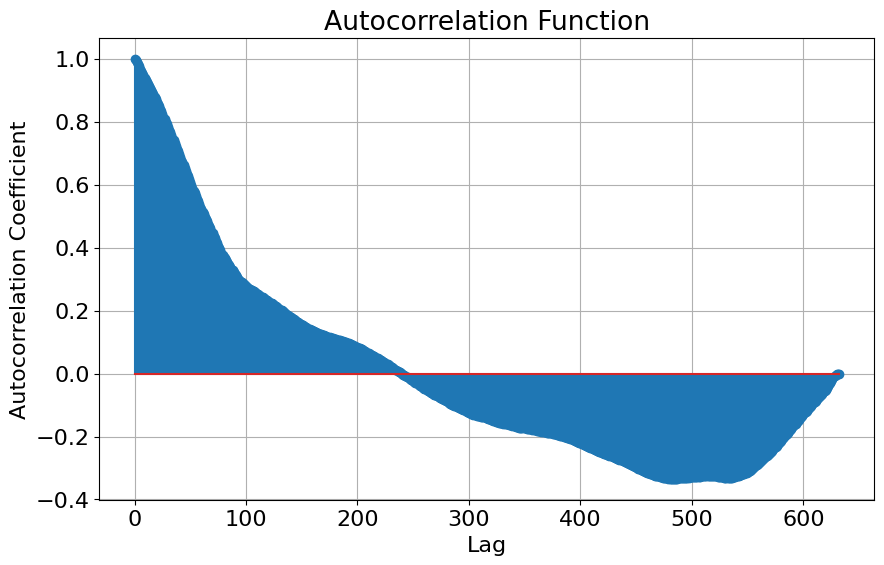

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def autocorrelation(data):
    """
    Time series autocorrelation function.

    Parameters:
        data (array-like): Time series data.

    Returns:
        acf (array-like): Array of autocorrelation coefficients.
    """
    data = np.asarray(data)
    n = len(data)
    mean = np.mean(data)
    data = data - mean
    autocovariance = np.correlate(data, data, mode='full')
    acf = autocovariance[n-1:] / autocovariance[n-1]
    return acf

# Example usage:
# Generate a sample time series data


# Calculate the autocorrelation
acf_values = autocorrelation(prices)

# Plot the autocorrelation function
plt.stem(range(len(acf_values)), acf_values)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation Coefficient')
plt.title('Autocorrelation Function')
plt.grid(True)
plt.show()


**Model 3: Dense (window = 30, horizon = 7)**

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(597, 597)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(477, 120, 477, 120)

In [ ]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

history_model_3=model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
4/4 [==============================] - 1s 178ms/step - loss: 16.2008 - mae: 16.2008 - val_loss: 18.5794 - val_mae: 18.5794
Epoch 2/100
4/4 [==============================] - 0s 122ms/step - loss: 10.7890 - mae: 10.7890 - val_loss: 12.3683 - val_mae: 12.3683
Epoch 3/100
4/4 [==============================] - 0s 126ms/step - loss: 7.3455 - mae: 7.3455 - val_loss: 8.1215 - val_mae: 8.1215
Epoch 4/100
4/4 [==============================] - 0s 127ms/step - loss: 4.4926 - mae: 4.4926 - val_loss: 5.8327 - val_mae: 5.8327
Epoch 5/100
4/4 [==============================] - 0s 123ms/step - loss: 3.5947 - mae: 3.5947 - val_loss: 4.6837 - val_mae: 4.6837
Epoch 6/100
4/4 [==============================] - 0s 123ms/step - loss: 2.3980 - mae: 2.3980 - val_loss: 2.6315 - val_mae: 2.6315
Epoch 7/100
4/4 [==============================] - 0s 126ms/step - loss: 1.1192 - mae: 1.1192 - val_loss: 2.0823 - val_mae: 2.0823
Epoch 8/100
4/4 [==============================] - 0s 12ms/step - loss: 1.1

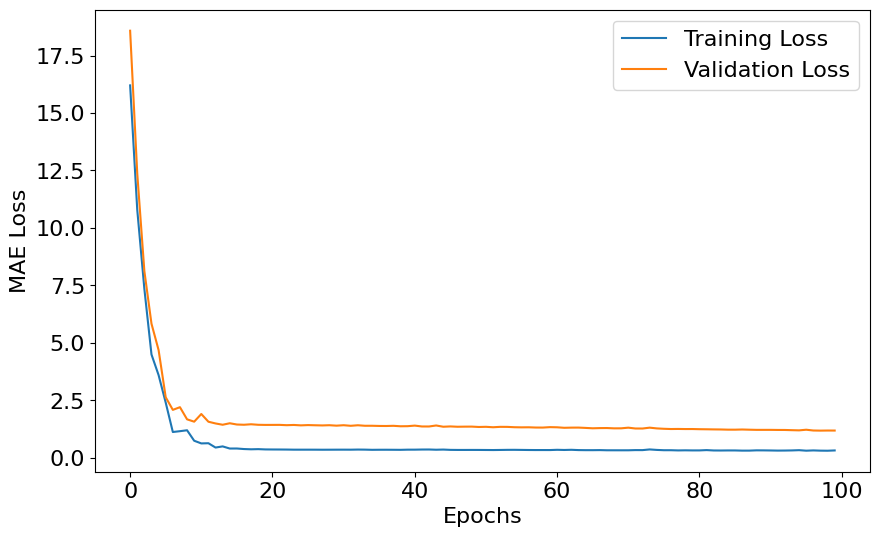

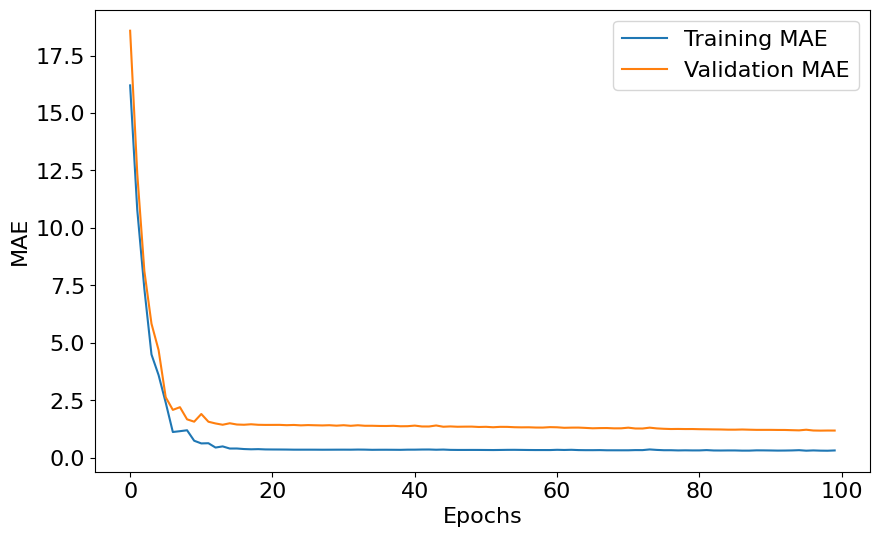

In [ ]:
# Eğitimdeki kayıp değerlerini çizin
plt.plot(history_model_3.history['loss'], label='Training Loss')
plt.plot(history_model_3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.legend()
plt.show()

# Eğitimdeki metrik değerlerini çizin
plt.plot(history_model_3.history['mae'], label='Training MAE')
plt.plot(history_model_3.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows, test_labels)

4/4 [==============================] - 0s 4ms/step - loss: 1.1823 - mae: 1.1823


[1.1822556257247925, 1.1822556257247925]

In [ ]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

4/4 [==============================] - 0s 4ms/step - loss: 1.1791 - mae: 1.1791


[1.1791085004806519, 1.1791085004806519]

In [ ]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

4/4 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[21.649431, 21.722391, 21.670748, 21.696192, 21.695374, 21.754929,
        21.636187],
       [21.65425 , 21.663996, 21.714005, 21.71854 , 21.737513, 21.741425,
        21.770462],
       [21.651579, 21.544258, 21.601107, 21.747286, 21.702065, 21.974516,
        21.766567],
       [21.6785  , 21.550081, 21.692593, 21.635008, 21.683702, 22.043377,
        21.789394],
       [21.61788 , 21.601212, 21.854774, 21.70204 , 21.730139, 21.974192,
        21.817211]], dtype=float32)>

In [ ]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1.1791085,
 'mse': 2.6140091,
 'rmse': 1.2782294,
 'mape': 4.361062,
 'mase': 7.484691}

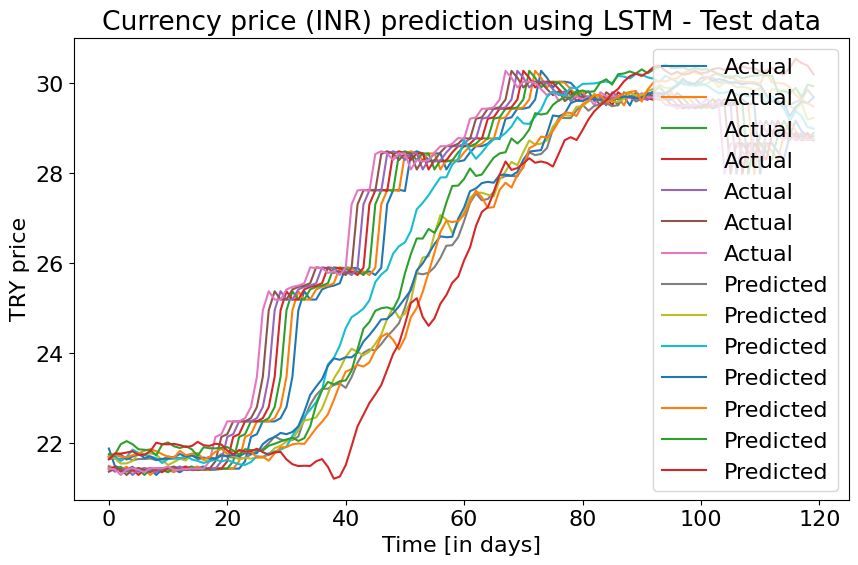

In [ ]:
plt.rc("figure", figsize=(10, 6))
plt.rcParams.update({'font.size': 16})
plt.plot(test_labels, label='Actual')
plt.plot(model_3_preds, label='Predicted')
plt.xlabel('Time [in days]')
plt.ylabel('TRY price')
plt.title('Currency price (INR) prediction using LSTM - Test data')
plt.legend()
plt.show()

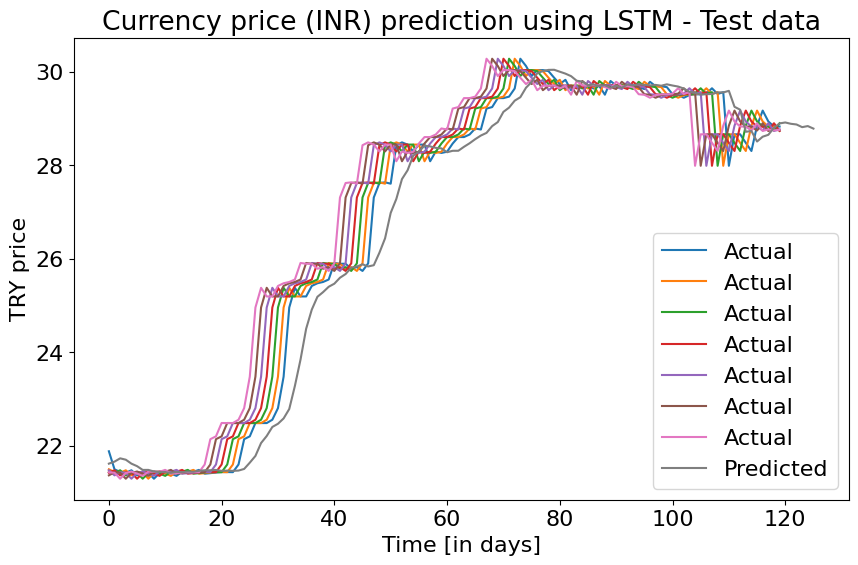

In [ ]:
plt.rc("figure", figsize=(10, 6))
plt.rcParams.update({'font.size': 16})
plt.plot(test_labels, label='Actual')
plt.plot(model_1_preds, label='Predicted')
plt.xlabel('Time [in days]')
plt.ylabel('TRY price')
plt.title('Currency price (INR) prediction using LSTM - Test data')
plt.legend()
plt.show()

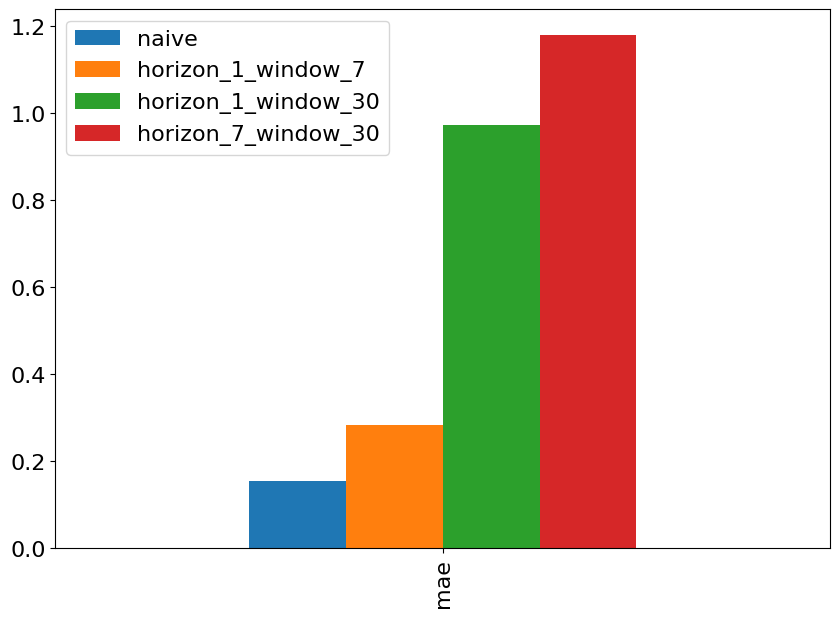

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

**Model 4: Conv1D**

In [ ]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [ ]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(626, 626)

In [ ]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(500, 126, 500, 126)

In [ ]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[19.067236]
 [18.451273]
 [18.451273]
 [18.80207 ]
 [15.199323]
 [13.982169]
 [13.670038]]


In [ ]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Conv1D(filters=64, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit model
history_model_4=model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=10,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

Epoch 1/10
4/4 [==============================] - 7s 355ms/step - loss: 16.1147 - mae: 16.1147 - val_loss: 20.8173 - val_mae: 20.8173
Epoch 2/10
4/4 [==============================] - 1s 201ms/step - loss: 12.9119 - mae: 12.9119 - val_loss: 16.4424 - val_mae: 16.4424
Epoch 3/10
4/4 [==============================] - 1s 205ms/step - loss: 9.9193 - mae: 9.9193 - val_loss: 11.7013 - val_mae: 11.7013
Epoch 4/10
4/4 [==============================] - 1s 201ms/step - loss: 6.4219 - mae: 6.4219 - val_loss: 5.7606 - val_mae: 5.7606
Epoch 5/10
4/4 [==============================] - 1s 200ms/step - loss: 2.0164 - mae: 2.0164 - val_loss: 1.6056 - val_mae: 1.6056
Epoch 6/10
4/4 [==============================] - 0s 13ms/step - loss: 2.1309 - mae: 2.1309 - val_loss: 3.7185 - val_mae: 3.7185
Epoch 7/10
4/4 [==============================] - 1s 303ms/step - loss: 2.1491 - mae: 2.1491 - val_loss: 0.9728 - val_mae: 0.9728
Epoch 8/10
4/4 [==============================] - 0s 21ms/step - loss: 0.6812 - m

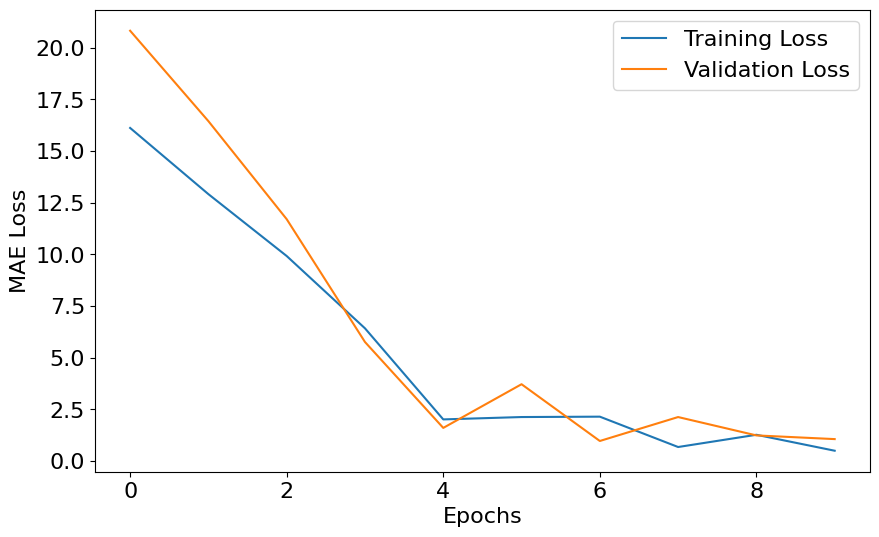

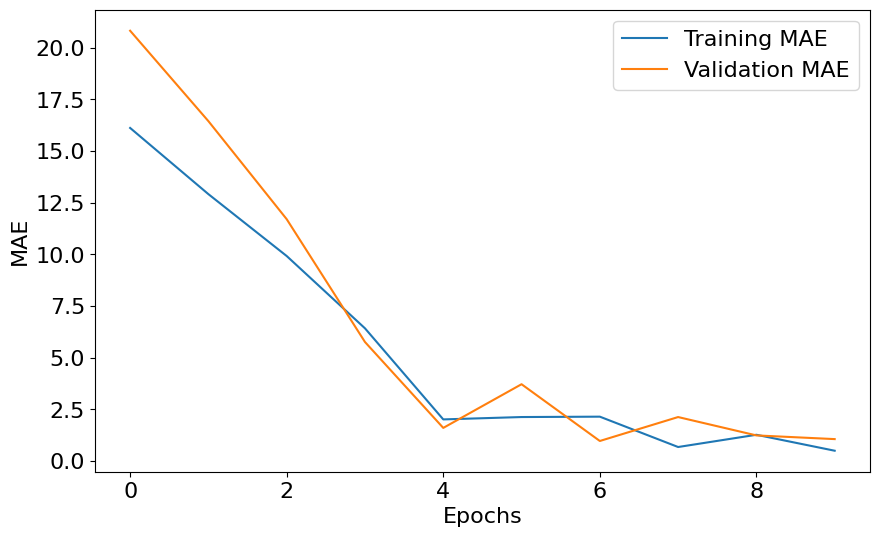

In [ ]:
import matplotlib.pyplot as plt

# Eğitimdeki kayıp değerlerini çizin
plt.plot(history_model_4.history['loss'], label='Training Loss')
plt.plot(history_model_4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.legend()
plt.show()

# Eğitimdeki metrik değerlerini çizin
plt.plot(history_model_4.history['mae'], label='Training MAE')
plt.plot(history_model_4.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 64)             41024     
                                                                 
 dense_6 (Dense)             (None, 1, 1)              65        
                                                                 
Total params: 45697 (178.50 KB)
Trainable params: 45697 (178.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

4/4 [==============================] - 0s 30ms/step - loss: 0.9728 - mae: 0.9728


[0.9728206396102905, 0.9728206396102905]

In [ ]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

4/4 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([22.480515, 22.502329, 22.536749, 22.523582, 22.51287 , 22.500267,
       22.474337, 22.424023, 22.34719 , 22.326912], dtype=float32)>

In [ ]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results


{'mae': 0.97282064,
 'mse': 1.1180944,
 'rmse': 1.0573999,
 'mape': 3.62101,
 'mase': 6.2801266}

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

**Model 5: RNN (LSTM)**

In [ ]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
#x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(64, activation="relu", return_sequences=True)(x)# using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
x = layers.LSTM(32, activation="relu", return_sequences=True)(x)
x = layers.Dense(16, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554
history_model_5=model_5.fit(train_windows,
            train_labels,
            epochs=45,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels))

Epoch 1/45
4/4 [==============================] - 7s 156ms/step - loss: 18.1146 - mae: 18.1146 - val_loss: 26.8817 - val_mae: 26.8817
Epoch 2/45
4/4 [==============================] - 0s 20ms/step - loss: 17.9591 - mae: 17.9591 - val_loss: 26.5365 - val_mae: 26.5365
Epoch 3/45
4/4 [==============================] - 0s 19ms/step - loss: 17.7319 - mae: 17.7319 - val_loss: 25.9786 - val_mae: 25.9786
Epoch 4/45
4/4 [==============================] - 0s 20ms/step - loss: 17.3280 - mae: 17.3280 - val_loss: 25.0070 - val_mae: 25.0070
Epoch 5/45
4/4 [==============================] - 0s 20ms/step - loss: 16.5991 - mae: 16.5991 - val_loss: 23.3746 - val_mae: 23.3746
Epoch 6/45
4/4 [==============================] - 0s 21ms/step - loss: 15.3631 - mae: 15.3631 - val_loss: 20.9540 - val_mae: 20.9540
Epoch 7/45
4/4 [==============================] - 0s 20ms/step - loss: 13.4537 - mae: 13.4537 - val_loss: 17.4572 - val_mae: 17.4572
Epoch 8/45
4/4 [==============================] - 0s 18ms/step - los

**# FARKLI BİR ŞEKİLDE KODLANMIŞ LSTM**

In [ ]:
tf.random.set_seed(42)

# Create model
model_90 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # reshape the inputs to be compatible with LSTM
  layers.LSTM(128, activation="relu", return_sequences=True),
  layers.LSTM(64, activation="relu", return_sequences=True),
  layers.LSTM(64, activation="relu"),
  layers.Dense(HORIZON)
], name="model_90_Deneme_lstm")

# Compile model
model_90.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit model
history_model_90 = model_90.fit(train_windows,
                             train_labels,
                             batch_size=128,
                             epochs=10,
                             verbose=1,
                             validation_data=(test_windows, test_labels),
                             callbacks=[create_model_checkpoint(model_name=model_90.name)])


In [ ]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

In [ ]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

4/4 [==============================] - 0s 5ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([21.609726, 21.598484, 21.607714, 21.555155, 21.459503, 21.431341,
       21.436197, 21.429998, 21.42074 , 21.425497], dtype=float32)>

In [ ]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 0.3658698,
 'mse': 0.35708994,
 'rmse': 0.59757,
 'mape': 1.373653,
 'mase': 2.3959525}

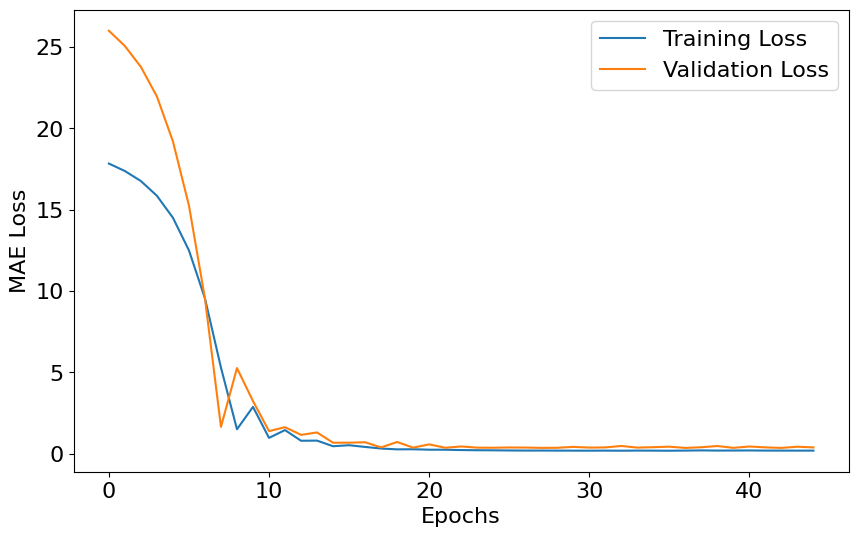

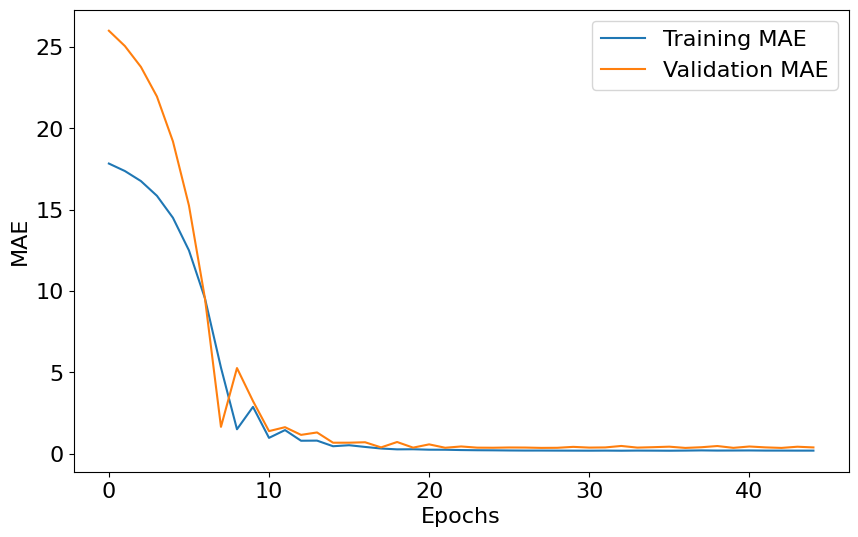

In [ ]:
# Eğitimdeki kayıp değerlerini çizin
plt.plot(history_model_5.history['loss'], label='Training Loss')
plt.plot(history_model_5.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.legend()
plt.show()

# Eğitimdeki metrik değerlerini çizin
plt.plot(history_model_5.history['mae'], label='Training MAE')
plt.plot(history_model_5.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

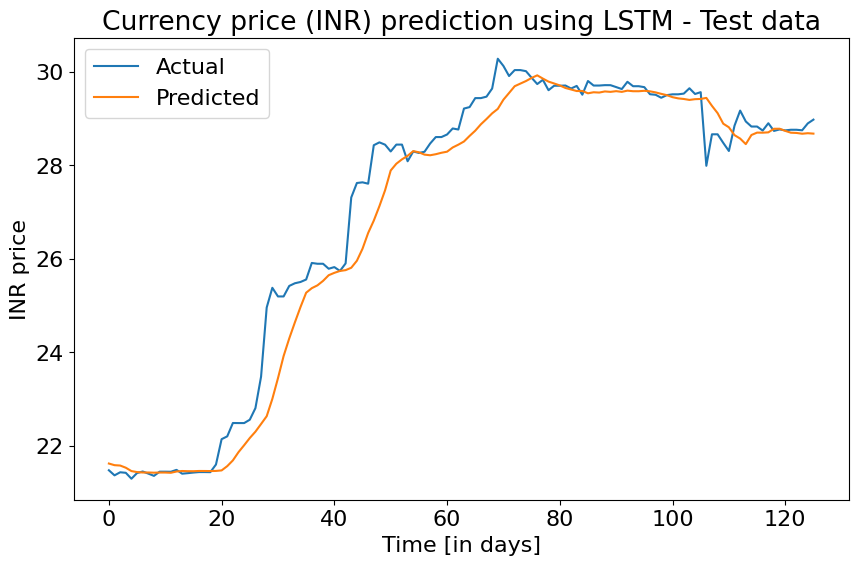

In [ ]:
plt.rc("figure", figsize=(10, 6))
plt.rcParams.update({'font.size': 16})
plt.plot(test_labels, label='Actual')
plt.plot(model_5_preds, label='Predicted')
plt.xlabel('Time [in days]')
plt.ylabel('INR price')
plt.title('Currency price (INR) prediction using LSTM - Test data')
plt.legend()
plt.show()


In [ ]:
# Train model on entire data to make prediction for the next day
y_all = data_tr_prices.dropna()["value"].to_numpy()

future_forecast_7 = make_future_forecast(values=y_all,
                                       model=model_5,
                                       into_future=115,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 21ms/step
Predicting on: 
 [28.762852 28.742915 28.755852 28.755852 28.74446  28.891764 28.972384] -> Prediction: 28.815181732177734

1/1 [==============================] - 0s 19ms/step
Predicting on: 
 [28.742915   28.755852   28.755852   28.74446    28.891764   28.972384
 28.81518173] -> Prediction: 28.821165084838867

1/1 [==============================] - 0s 20ms/step
Predicting on: 
 [28.755852   28.755852   28.74446    28.891764   28.972384   28.81518173
 28.82116508] -> Prediction: 28.842248916625977

1/1 [==============================] - 0s 21ms/step
Predicting on: 
 [28.755852   28.74446    28.891764   28.972384   28.81518173 28.82116508
 28.84224892] -> Prediction: 28.840181350708008

1/1 [==============================] - 0s 22ms/step
Predicting on: 
 [28.74446    28.891764   28.972384   28.81518173 28.82116508 28.84224892
 28.84018135] -> Prediction: 28.85163688659668

1/1 [==============================] - 0s 21ms/step
Predicting 

In [ ]:
future_forecast_7

In [ ]:
confidence_level = 0.95  # Yüzde 95 güven düzeyi

for value in future_forecast_7:
    std_deviation = np.std(future_forecast_7) # Her bir değer için standart sapma hesapla

    margin_of_error = std_deviation * 1.96  # 1.96, yüzde 95 güven düzeyine karşılık gelen Z-skorudur
c=1
for value in future_forecast_7:
    lower_bound = value - margin_of_error
    upper_bound = value + margin_of_error
    print(c,". Gün")
    c=c+1
    print(f"[ Alt Sınır: {lower_bound:.4f} - Gerçek Değer: {value:.4f} - Üst Sınır: {upper_bound:.4f} ]")
    print(" ")
    print(" ")


1 . Gün
[ Alt Sınır: 28.5784 - Gerçek Değer: 28.8152 - Üst Sınır: 29.0519 ]
 
 
2 . Gün
[ Alt Sınır: 28.5844 - Gerçek Değer: 28.8212 - Üst Sınır: 29.0579 ]
 
 
3 . Gün
[ Alt Sınır: 28.6055 - Gerçek Değer: 28.8422 - Üst Sınır: 29.0790 ]
 
 
4 . Gün
[ Alt Sınır: 28.6034 - Gerçek Değer: 28.8402 - Üst Sınır: 29.0769 ]
 
 
5 . Gün
[ Alt Sınır: 28.6149 - Gerçek Değer: 28.8516 - Üst Sınır: 29.0884 ]
 
 
6 . Gün
[ Alt Sınır: 28.6451 - Gerçek Değer: 28.8818 - Üst Sınır: 29.1186 ]
 
 
7 . Gün
[ Alt Sınır: 28.6485 - Gerçek Değer: 28.8853 - Üst Sınır: 29.1221 ]
 
 
8 . Gün
[ Alt Sınır: 28.6245 - Gerçek Değer: 28.8612 - Üst Sınır: 29.0980 ]
 
 
9 . Gün
[ Alt Sınır: 28.6318 - Gerçek Değer: 28.8686 - Üst Sınır: 29.1053 ]
 
 
10 . Gün
[ Alt Sınır: 28.6403 - Gerçek Değer: 28.8771 - Üst Sınır: 29.1139 ]
 
 
11 . Gün
[ Alt Sınır: 28.6426 - Gerçek Değer: 28.8794 - Üst Sınır: 29.1161 ]
 
 
12 . Gün
[ Alt Sınır: 28.6492 - Gerçek Değer: 28.8860 - Üst Sınır: 29.1227 ]
 
 
13 . Gün
[ Alt Sınır: 28.6569 - Gerçe

**Make a multivariate time series**

ARS-TRY: 0.9433
TRY-ARS: 0.9433
TRY-JPY: 0.9096
JPY-TRY: 0.9096
LAK-TRY: 0.8997
TRY-LAK: 0.8997
TRY-NGN: 0.8970
NGN-TRY: 0.8970
SEK-TRY: 0.8889
TRY-SEK: 0.8889
TRY-CNY: 0.8693
CNY-TRY: 0.8693
TRY-SRD: 0.8627
SRD-TRY: 0.8627


In [ ]:
data_cny = df.loc[df.currency == 'CNY']

In [ ]:
data_tr_prices["cny_value"] = data_cny["value"].values


<ipython-input-344-bda9d766be5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tr_prices["cny_value"] = data_cny["value"].values


In [ ]:
data_tr_prices

,Unnamed: 0,Country/Currency,currency,value,cny_value
date,,,,,
2021-12-17,141,Turkish New Lira,TRY,19.067235,7.220899
2021-12-18,291,Turkish New Lira,TRY,18.451273,7.164741
2021-12-20,591,Turkish New Lira,TRY,18.802070,7.171681
2021-12-21,741,Turkish New Lira,TRY,15.199323,7.193097
2021-12-22,891,Turkish New Lira,TRY,13.982169,7.192181
...,...,...,...,...,...
2023-05-09,94296,Turkish New Lira,TRY,28.895616,7.849022
2023-06-09,94445,Turkish New Lira,TRY,28.731184,7.832213
2023-07-09,94594,Turkish New Lira,TRY,28.762852,7.846499


In [ ]:
data_tr_prices=data_tr_prices.drop(["Unnamed: 0","Country/Currency","currency"],axis=1)

In [ ]:
data_tr_multi_prices=data_tr_prices

In [ ]:
data_tr_multi_prices

,value,cny_value
date,,
2021-12-17,19.067235,7.220899
2021-12-18,18.451273,7.164741
2021-12-20,18.802070,7.171681
2021-12-21,15.199323,7.193097
2021-12-22,13.982169,7.192181
...,...,...
2023-05-09,28.895616,7.849022
2023-06-09,28.731184,7.832213
2023-07-09,28.762852,7.846499


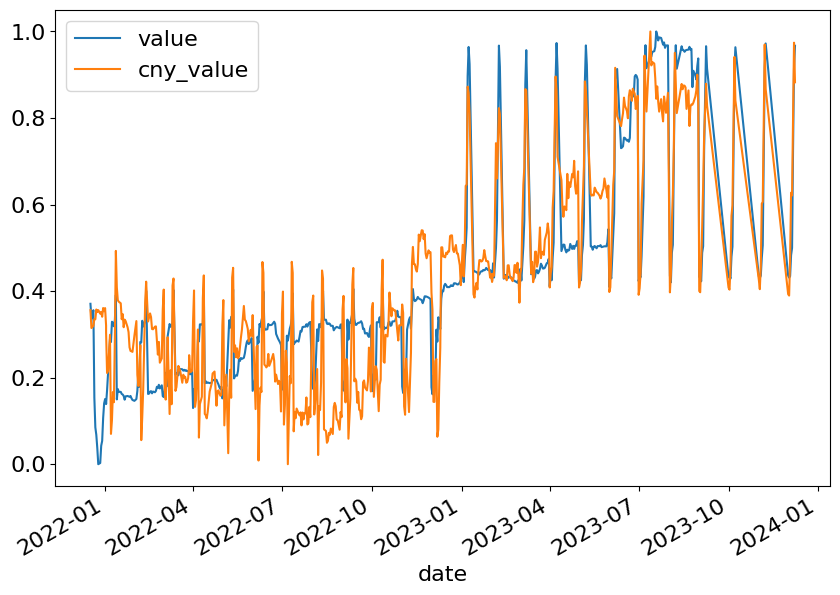

In [ ]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(data_tr_multi_prices[["value","cny_value"]]), # we need to scale the data first
                                     columns=data_tr_multi_prices.columns,
                                     index=data_tr_multi_prices.index)
scaled_price_block_df.plot(figsize=(10, 7));

**Daha önceki kodlar çalışmaz çok değişkenli oldğu için onun için SHIFT yöntemi kullanılır**

In [ ]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of the Bitcoin historical data with block reward feature
data_tr_multi_prices_windowed = data_tr_multi_prices.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  data_tr_multi_prices_windowed[f"value+{i+1}"] = data_tr_multi_prices_windowed["value"].shift(periods=i+1)
data_tr_multi_prices_windowed.head(10)

,value,cny_value,value+1,value+2,value+3,value+4,value+5,value+6,value+7
date,,,,,,,,,
2021-12-17,19.067235,7.220899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-18,18.451273,7.164741,19.067235,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-20,18.802070,7.171681,18.451273,19.067235,NaN,NaN,NaN,NaN,NaN
2021-12-21,15.199323,7.193097,18.802070,18.451273,19.067235,NaN,NaN,NaN,NaN
2021-12-22,13.982169,7.192181,15.199323,18.802070,18.451273,19.067235,NaN,NaN,NaN
2021-12-23,13.670038,7.223100,13.982169,15.199323,18.802070,18.451273,19.067235,NaN,NaN
2021-12-24,13.129361,7.214925,13.670038,13.982169,15.199323,18.802070,18.451273,19.067235,NaN
2021-12-25,12.464678,7.221110,13.129361,13.670038,13.982169,15.199323,18.802070,18.451273,19.067235
2021-12-27,12.513801,7.209898,12.464678,13.129361,13.670038,13.982169,15.199323,18.802070,18.451273


In [ ]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors          "KISACA PRİCE->Y PRİCE HARİÇ->X"
X = data_tr_multi_prices_windowed.dropna().drop("value", axis=1).astype(np.float32)
y = data_tr_multi_prices_windowed.dropna()["value"].astype(np.float32)
X.head()

,cny_value,value+1,value+2,value+3,value+4,value+5,value+6,value+7
date,,,,,,,,
2021-12-25,7.221110,13.129361,13.670038,13.982169,15.199323,18.802071,18.451273,19.067236
2021-12-27,7.209898,12.464678,13.129361,13.670038,13.982169,15.199323,18.802071,18.451273
2021-12-28,7.215522,12.513801,12.464678,13.129361,13.670038,13.982169,15.199323,18.802071
2021-12-29,7.200337,13.223056,12.513801,12.464678,13.129361,13.670038,13.982169,15.199323
2021-12-30,7.227794,13.425872,13.223056,12.513801,12.464678,13.129361,13.670038,13.982169


In [ ]:
# View labels
y.head()

date
2021-12-25    12.464678
2021-12-27    12.513801
2021-12-28    13.223056
2021-12-29    13.425872
2021-12-30    14.372093
Name: value, dtype: float32

In [ ]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(452, 452, 113, 113)

In [ ]:
# Building a multivariate Model

tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
history_model_6=model_6.fit(X_train, y_train,
            epochs=75,
            batch_size=128,
            verbose=1, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [ ]:
# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.2834


0.28338366746902466

In [ ]:
# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

4/4 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([21.507256, 21.559216, 21.558125, 21.657063, 21.647974, 21.585432,
       21.50561 , 21.584324, 21.486523, 21.503418], dtype=float32)>

In [ ]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 0.28338367,
 'mse': 0.22256508,
 'rmse': 0.47176805,
 'mape': 1.0731925,
 'mase': 1.5984173}

In [ ]:
last_7_days_windows = X[-7:]

last_7_days_windows = np.array(last_7_days_windows)  # Veriyi NumPy dizisine çeviriyoruz
predictions = tf.squeeze(model_6.predict(last_7_days_windows))

# Tahmin sonuçlarını görüntüleyin
print("7 Günlük Euro Tahminleri:")
print(predictions)

1/1 [==============================] - 0s 63ms/step
7 Günlük Euro Tahminleri:
tf.Tensor([28.86381  28.844702 28.840982 28.881168 28.866198 28.85523  28.8067  ], shape=(7,), dtype=float32)


In [ ]:
# Alt, tahmin ve üst tahminleri hesaplayın
lower, upper = get_upper_lower(preds=predictions)

# Tahmin sonuçlarını ve tahmin aralıklarını görüntüleyin
for i in range(len(predictions)):
    print(f"Gün {i + 1}:")
    print(f"Alt Tahmin: {lower[i]}")
    print(f"Tahmin: {predictions[i]}")
    print(f"Üst Tahmin: {upper[i]}")
    print()

**MODEL 7 N-BEATS**

In [ ]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [ ]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.5737461  -0.19885084  0.11944595  1.0975059  -0.25591695 -0.02042568
 -0.3430173 ]
Forecast: -0.3219009041786194


Preparing data for the N-BEATS algorithm

In [ ]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [ ]:
# Create NBEATS data inputs (NBEATS works with univariate time series)
data_tr_multi_prices.head()

,value,usd_value
date,,
2021-12-17,19.067235,1.132548
2021-12-18,18.451273,1.123810
2021-12-19,18.451273,1.123810
2021-12-20,18.802070,1.124405
2021-12-21,15.199323,1.128382


In [ ]:
# Add windowed columns
data_tr_multi_prices_nbeats = data_tr_multi_prices.copy()
for i in range(WINDOW_SIZE):
  data_tr_multi_prices_nbeats[f"value+{i+1}"] = data_tr_multi_prices_nbeats["value"].shift(periods=i+1)
data_tr_multi_prices_nbeats.dropna().head()

,value,usd_value,value+1,value+2,value+3,value+4,value+5,value+6,value+7
date,,,,,,,,,
2021-12-24,13.129361,1.132535,13.670038,13.982169,15.199323,18.802070,18.451273,18.451273,19.067235
2021-12-25,12.464678,1.134039,13.129361,13.670038,13.982169,15.199323,18.802070,18.451273,18.451273
2021-12-26,12.464678,1.134039,12.464678,13.129361,13.670038,13.982169,15.199323,18.802070,18.451273
2021-12-27,12.513801,1.131958,12.464678,12.464678,13.129361,13.670038,13.982169,15.199323,18.802070
2021-12-28,13.223056,1.132522,12.513801,12.464678,12.464678,13.129361,13.670038,13.982169,15.199323


In [ ]:
# Make features and labels
X = data_tr_multi_prices_nbeats.dropna().drop("value", axis=1)
y = data_tr_multi_prices_nbeats.dropna()["value"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(500, 500, 126, 126)

In [ ]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 8), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 8), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [ ]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 120 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [ ]:
from tensorflow.keras import layers
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

In [ ]:

 %%time

tf.random.set_seed(42)
INPUT_SIZE=8
# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=1, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])

In [ ]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 28ms/step - loss: 0.6081 - mae: 0.6081 - mse: 0.8642


[0.6080629825592041, 0.6080629825592041, 0.8641970157623291]

In [ ]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([21.713842, 21.499521, 21.448505, 21.511932, 21.66044 , 21.564257,
       21.954613, 21.951797, 21.568993, 21.512693], dtype=float32)>

In [ ]:
# Evaluate N-BEATS model predictions
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 0.608063,
 'mse': 0.864197,
 'rmse': 0.92962193,
 'mape': 2.279293,
 'mase': 3.9254026}

In [ ]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

In [ ]:
# This will error out unless a "get_config()" method is implemented - this could be extra curriculum
model_7.save(model_7.name)

**Ensemble Model**

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=1,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])

      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models


In [ ]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=50)

Optimizing model by reducing: mae for 50 epochs, model number: 0
Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 14.1369 - mae: 14.1369 - mse: 202.2482 - val_loss: 5.2062 - val_mae: 5.2062 - val_mse: 28.1457 - lr: 0.0010
Epoch 2/50
1/1 [==============================] - 0s 24ms/step - loss: 3.7584 - mae: 3.7584 - mse: 14.4295 - val_loss: 9.7247 - val_mae: 9.7247 - val_mse: 96.0838 - lr: 0.0010
Epoch 3/50
1/1 [==============================] - 0s 34ms/step - loss: 6.4310 - mae: 6.4310 - mse: 42.0435 - val_loss: 13.4494 - val_mae: 13.4494 - val_mse: 183.5862 - lr: 0.0010
Epoch 4/50
1/1 [==============================] - 0s 23ms/step - loss: 8.9675 - mae: 8.9675 - mse: 81.5698 - val_loss: 11.8583 - val_mae: 11.8583 - val_mse: 142.7564 - lr: 0.0010
Epoch 5/50
1/1 [==============================] - 0s 23ms/step - loss: 7.8861 - mae: 7.8861 - mse: 63.1212 - val_loss: 7.1233 - val_mae: 7.1233 - val_mse: 51.6760 - lr: 0.0010
Epoch 6/50
1/1 [==============================] 

In [ ]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 37ms/step


<tf.Tensor: shape=(15, 126), dtype=float32, numpy=
array([[22.715628, 22.588158, 22.61684 , ..., 30.049194, 30.250809,
        30.161686],
       [18.712135, 18.62402 , 18.556677, ..., 25.108267, 25.022608,
        24.916365],
       [21.697731, 21.561508, 21.39779 , ..., 28.605677, 28.534399,
        28.646746],
       ...,
       [19.10028 , 19.155617, 19.04884 , ..., 25.367582, 25.37203 ,
        25.321747],
       [22.556944, 22.479748, 22.484919, ..., 30.00775 , 29.89352 ,
        29.778862],
       [20.217989, 20.16515 , 20.274658, ..., 26.761372, 26.928892,
        27.000309]], dtype=float32)>

In [ ]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 0.49602294,
 'mse': 0.41146088,
 'rmse': 0.64145213,
 'mape': 1.8731818,
 'mase': 3.2021184}

In [ ]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

In [ ]:
# Get the upper and lower bounds of the 95%
lower, upper = get_upper_lower(preds=ensemble_preds)

**Model 9: Train a model on the full historical data to make predictions into future**

In [ ]:
data_tr_multi_prices_windowed.head()

,value,usd_value,value+1,value+2,value+3,value+4,value+5,value+6,value+7
date,,,,,,,,,
2021-12-17,19.067235,1.132548,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-18,18.451273,1.123810,19.067235,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-19,18.451273,1.123810,18.451273,19.067235,NaN,NaN,NaN,NaN,NaN
2021-12-20,18.802070,1.124405,18.451273,18.451273,19.067235,NaN,NaN,NaN,NaN
2021-12-21,15.199323,1.128382,18.802070,18.451273,18.451273,19.067235,NaN,NaN,NaN


In [ ]:
# Train model on entire data to make prediction for the next day
X_all = data_tr_multi_prices_windowed.drop(["value", "usd_value"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = data_tr_multi_prices_windowed.dropna()["value"].to_numpy()

In [ ]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=125,
            verbose=1) # don't print out anything, we've seen this all before

Epoch 1/125
1/1 [==============================] - 4s 4s/step - loss: 20.7911
Epoch 2/125
1/1 [==============================] - 0s 12ms/step - loss: 17.3815
Epoch 3/125
1/1 [==============================] - 0s 14ms/step - loss: 14.1107
Epoch 4/125
1/1 [==============================] - 0s 18ms/step - loss: 10.8265
Epoch 5/125
1/1 [==============================] - 0s 20ms/step - loss: 7.5314
Epoch 6/125
1/1 [==============================] - 0s 23ms/step - loss: 4.2646
Epoch 7/125
1/1 [==============================] - 0s 15ms/step - loss: 0.8806
Epoch 8/125
1/1 [==============================] - 0s 10ms/step - loss: 2.5509
Epoch 9/125
1/1 [==============================] - 0s 10ms/step - loss: 4.4104
Epoch 10/125
1/1 [==============================] - 0s 9ms/step - loss: 5.1467
Epoch 11/125
1/1 [==============================] - 0s 11ms/step - loss: 5.0764
Epoch 12/125
1/1 [==============================] - 0s 10ms/step - loss: 4.4023
Epoch 13/125
1/1 [==============================

In [ ]:
# How many timesteps to predict into the future?
INTO_FUTURE = 7

In [ ]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [ ]:
# Make forecasts into future of the price of Bitcoin
# Note: if you're reading this at a later date, you may already be in the future, so the forecasts
# we're making may not actually be forecasts, if that's the case, readjust the training data.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 64ms/step
Predicting on: 
 [28.824771 28.738926 28.895616 28.731184 28.762852 28.742915 28.755852] -> Prediction: 28.80476188659668

1/1 [==============================] - 0s 20ms/step
Predicting on: 
 [28.738926   28.895616   28.731184   28.762852   28.742915   28.755852
 28.80476189] -> Prediction: 28.78097152709961

1/1 [==============================] - 0s 24ms/step
Predicting on: 
 [28.895616   28.731184   28.762852   28.742915   28.755852   28.80476189
 28.78097153] -> Prediction: 28.8222599029541

1/1 [==============================] - 0s 22ms/step
Predicting on: 
 [28.731184   28.762852   28.742915   28.755852   28.80476189 28.78097153
 28.8222599 ] -> Prediction: 28.771480560302734

1/1 [==============================] - 0s 23ms/step
Predicting on: 
 [28.762852   28.742915   28.755852   28.80476189 28.78097153 28.8222599
 28.77148056] -> Prediction: 28.80743980407715

1/1 [==============================] - 0s 22ms/step
Predicting on: 


In [ ]:
future_forecast

[28.804762, 28.780972, 28.82226, 28.77148, 28.80744, 28.788746, 28.814981]

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [ ]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = data_tr_multi_prices.index[-1]
last_timestep

Timestamp('2023-09-09 00:00:00')

In [ ]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2023-09-10', '2023-09-11', '2023-09-12', '2023-09-13',
       '2023-09-14', '2023-09-15', '2023-09-16'], dtype='datetime64[D]')

**Model 10-Turkey Problem**

In [ ]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,0.153675,0.090934,0.301553,0.574748,0.992063
model_1_dense_w7_h1,0.283668,0.238650,0.488518,1.072350,1.831246
model_2_dense_w30_h1,0.971649,1.929556,1.389085,3.619409,6.221955
model_3_dense_w30_h7,1.179109,2.614009,1.278229,4.361062,7.484691
model_4_CONV1D,0.972821,1.118094,1.057400,3.621010,6.280127
model_5_LSTM,0.324744,0.250614,0.500614,1.236229,2.096411
model_6_multivariate,0.304460,0.252385,0.502379,1.154723,1.965467
model_8_NBEATs,0.608063,0.864197,0.929622,2.279293,3.925403
model_9_ensemble,0.496023,0.411461,0.641452,1.873182,3.202118


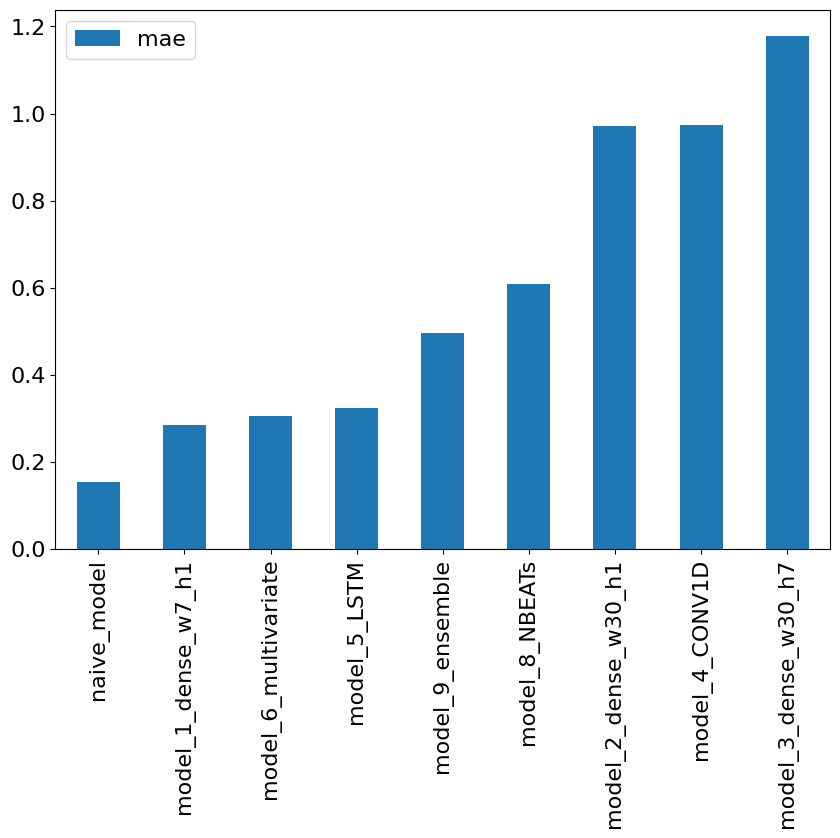

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");